# US Economic Data From 1917-2022

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('US_Economy.csv')
df.sort_values('CPI', ascending = False)
pd.options.display.max_rows = 200

# Raw Data

In [81]:
df2 = df.sort_values('CPI', ascending = False)
df2.head()

,Year,Money_In_Circ,Money_Printed_billions,Prct_Chnge_Printed,CPI,Purch_Power
0,2021,2168.081083,220.671000,11.331512,267.203000,12.324401
1,2020,1947.410083,202.310917,11.593090,258.811167,13.290019
2,2019,1745.099167,83.635167,5.033824,255.657417,14.650022
3,2018,1661.464000,106.021333,6.816152,251.106833,15.113589
4,2017,1555.442667,97.917667,6.718078,245.119583,15.758831


# Graph of CPI per Year

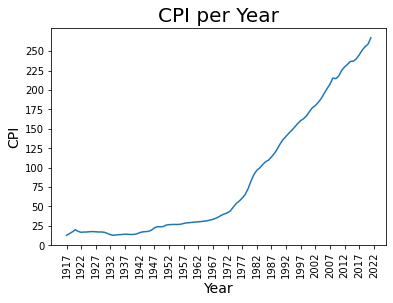

In [85]:
x = df['Year']
y = df['CPI']

plt.plot(df['Year'], df['CPI'])
plt.xticks(np.arange(min(x), 2023, 5.0), rotation = 'vertical')
plt.yticks(np.arange(0, max(y), 25))
plt.title('CPI per Year', size = 20)
plt.xlabel('Year', size = 14)
plt.ylabel('CPI', size = 14)
plt.show()

# Graph of Purchasing Power per Year

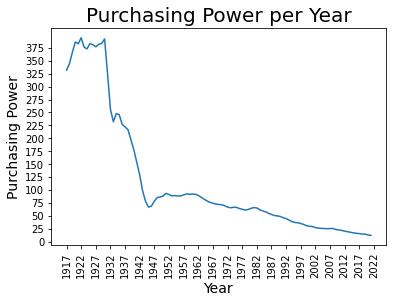

In [84]:
x = df['Year']
y = df['Purch_Power']

plt.plot(df['Year'], df['Purch_Power'])
plt.xticks(np.arange(min(x), 2023, 5.0), rotation = 'vertical')
plt.yticks(np.arange(0, max(y), 25))
plt.title('Purchasing Power per Year', size = 20)
plt.xlabel('Year', size = 14)
plt.ylabel('Purchasing Power', size = 14)
plt.show()

# Graph of Currency Circulating Value per Year

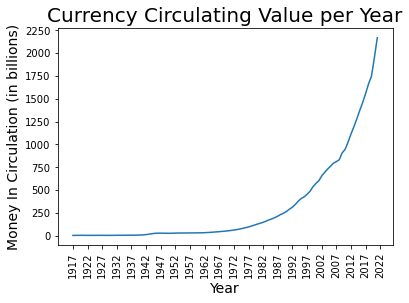

In [83]:
x = df['Year']
y = df['Money_In_Circ']

plt.plot(df['Year'], df['Money_In_Circ'])
plt.xticks(np.arange(min(x), 2023, 5.0), rotation = 'vertical')
plt.yticks(np.arange(0, max(y)+250, 250))
plt.title('Currency Circulating Value per Year', size = 20)
plt.xlabel('Year', size = 14)
plt.ylabel('Money In Circulation (in billions)', size = 14)
plt.show()

# Graph Percent Change Printed

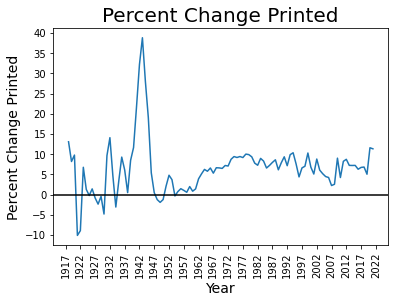

In [107]:
x = df['Year']
y = df['Prct_Chnge_Printed']

plt.plot(df['Year'], df['Prct_Chnge_Printed'])
plt.xticks(np.arange(min(x), 2023, 5.0), rotation = 'vertical')
plt.yticks(np.arange(-10, max(y)+5, 5))
plt.title('Percent Change Printed', size = 20)
plt.xlabel('Year', size = 14)
plt.ylabel('Percent Change Printed', size = 14)
plt.axhline(y=0, color='k', linestyle='-')
plt.show()